In [27]:
# 0: Libraries
import pandas as pd                     # Data manipulation and analysis
import matplotlib.pyplot as plt         # Data visualization
import numpy as np                      # Numerical operations
from scipy.stats import expon, weibull_min  # Statistical modeling

In [28]:
# Load failure data from CSV file
data = pd.read_csv('../01_data/actuator_failures_small.csv')  # Reads the dataset into a DataFrame

# Display the first few rows of the dataset to verify it loaded correctly
print(data.head())

  Component_ID Failure_Date  Operating_Hours_Since_Last_Failure
0   ACT-FA-001   2023-01-05                                 380
1   ACT-FA-001   2023-02-15                                 400
2   ACT-FA-001   2023-04-03                                 395
3   ACT-FA-001   2023-06-10                                 410
4   ACT-FA-001   2023-08-20                                 390


In [29]:
# Step 1: Calculate MTBF (Mean Time Between Failures)

# 1.1: Calculate mean based on loaded data
mtbf = data['Operating_Hours_Since_Last_Failure'].mean()
print(f"Mean Time Between Failures (MTBF): {mtbf:.2f} hours")

# 1.2: Count number of failure occurrence
failure_count = len(data)

Mean Time Between Failures (MTBF): 396.67 hours


In [30]:
# Step 2: Calculate failure rate (λ)
# Failure rate is the inverse of MTBF (assuming constant failure rate)
failure_rate = 1 / mtbf 
# Display value of calculated failure Estimed failure rate
print(f"Estimated Failure Rate: {failure_rate:.6f} failures per hour")

Estimated Failure Rate: 0.002521 failures per hour


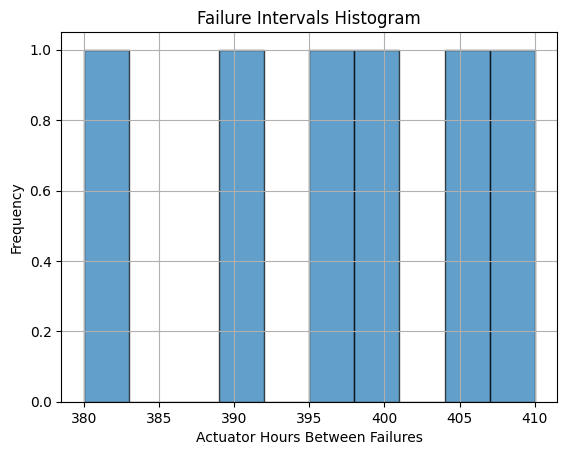

In [31]:
# Step 3: Plot histogram of failure intervals
# This helps visualize how failure intervals are distributed
plt.hist(data['Operating_Hours_Since_Last_Failure'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Failure Intervals Histogram')                     # Title of the plot
plt.xlabel('Actuator Hours Between Failures')                  # X-axis label
plt.ylabel('Frequency')                                      # Y-axis label
plt.grid(True)                                               # Add grid for readability
plt.show()                                                   # Display the plot

In [32]:
# Step 4 Calculate cumulative time and failure number
data['Cumulative_Time'] = data['Operating_Hours_Since_Last_Failure'].cumsum()

#Count failure number
data['Failure_Number'] = range(1, len(data) + 1)
#Failure rate
data['Failure_Rate'] = data['Failure_Number'] / data['Cumulative_Time']

In [34]:
# --- Weibull Fit ---
shape, loc, scale = weibull_min.fit(data['Operating_Hours_Since_Last_Failure'], floc=0)  # Weibull parameters: β (shape), η (scale)

In [35]:
# Generate time points and Weibull hazard function (failure rate)
time_points = np.linspace(1, data['Cumulative_Time'].max(), 100)
weibull_failure_rate = (shape / scale) * (time_points / scale) ** (shape - 1)

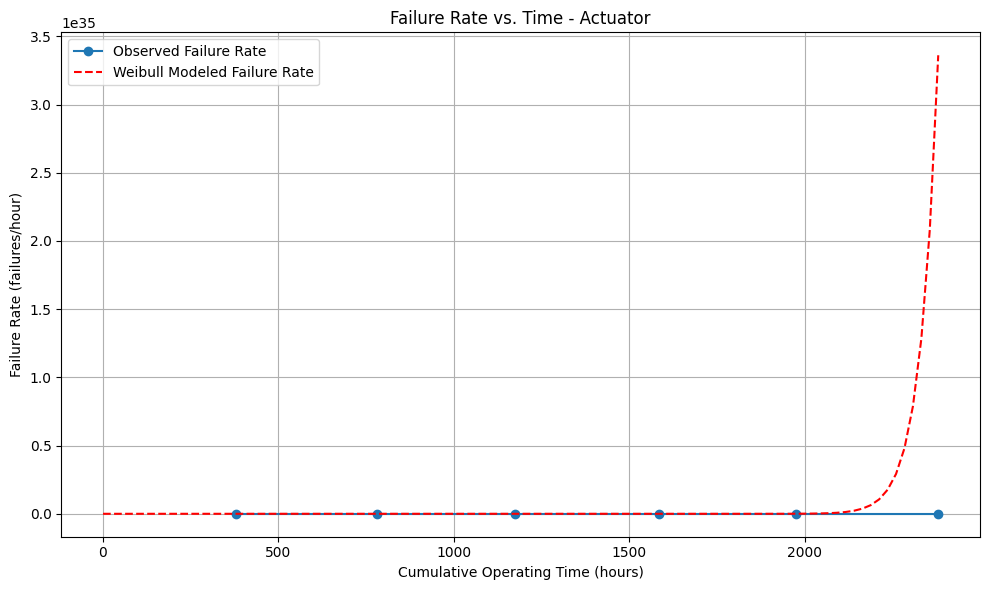

In [36]:
# --- Plot Observed and Weibull Failure Rate ---
plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative_Time'], data['Failure_Rate'], marker='o', linestyle='-', label='Observed Failure Rate')
plt.plot(time_points, weibull_failure_rate, 'r--', label='Weibull Modeled Failure Rate')
plt.title('Failure Rate vs. Time - Actuator')
plt.xlabel('Cumulative Operating Time (hours)')
plt.ylabel('Failure Rate (failures/hour)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Summary 